## 1. Setup

In [87]:
# Import necessary libraries
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers, models

## 2. Load and Explore the Dataset

Total First Print Images: 100
Total Second Print Images: 100


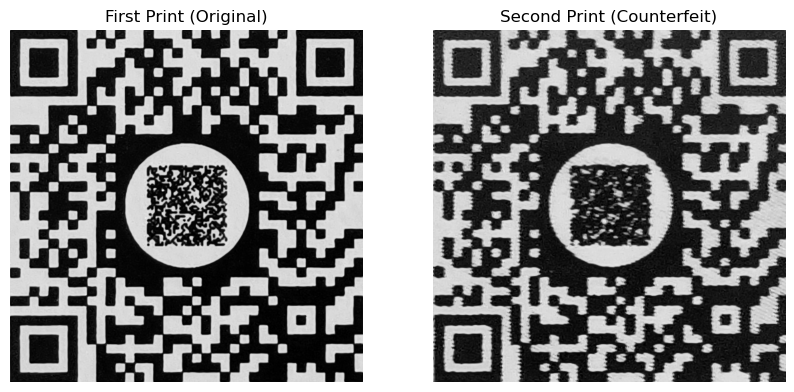

In [88]:
# Define dataset directories
first_print_dir = r"C:\Users\hp\First Print"
second_print_dir = r"C:\Users\hp\Second Print"

# Get list of image files
first_print_images = [os.path.join(first_print_dir, img) for img in os.listdir(first_print_dir) if img.endswith(".png")]
second_print_images = [os.path.join(second_print_dir, img) for img in os.listdir(second_print_dir) if img.endswith(".png")]

# Print dataset statistics
print(f"Total First Print Images: {len(first_print_images)}")
print(f"Total Second Print Images: {len(second_print_images)}")

# Display sample images
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(cv2.imread(first_print_images[0], cv2.IMREAD_GRAYSCALE), cmap="gray")
ax[0].set_title("First Print (Original)")
ax[0].axis("off")

ax[1].imshow(cv2.imread(second_print_images[0], cv2.IMREAD_GRAYSCALE), cmap="gray")
ax[1].set_title("Second Print (Counterfeit)")
ax[1].axis("off")

plt.show()


## 3. Data Preprocessing and Feature Extraction

In [89]:
# Image preprocessing function
def preprocess_image(image_path, img_size=128):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
    image = cv2.resize(image, (img_size, img_size))  # Resize for consistency
    return image.flatten()  # Convert to 1D feature vector

# Prepare dataset
X = []
y = []

# Load First Print images
for img_path in first_print_images:
    X.append(preprocess_image(img_path))
    y.append("First Print")

# Load Second Print images
for img_path in second_print_images:
    X.append(preprocess_image(img_path))
    y.append("Second Print")

# Convert to NumPy arrays
X = np.array(X)
y = np.array(y)

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

print("Data preprocessing complete. Feature shape:", X_train.shape)  

Data preprocessing complete. Feature shape: (160, 16384)


## 4. Traditional Machine Learning Model

Random Forest Model Performance:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.95      0.95      0.95        19

    accuracy                           0.95        40
   macro avg       0.95      0.95      0.95        40
weighted avg       0.95      0.95      0.95        40



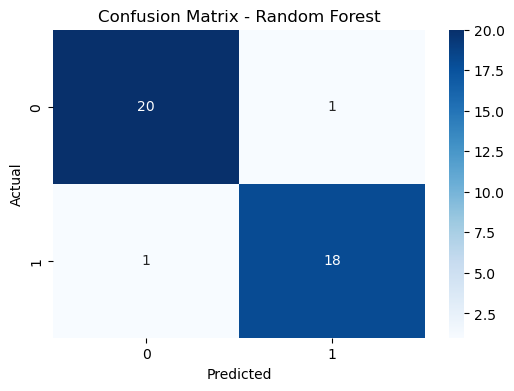

In [90]:
# Train a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate model
print("Random Forest Model Performance:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

## 5. Deep Learning Model (CNN)

C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 893ms/step - accuracy: 0.5489 - loss: 228.8201 - val_accuracy: 0.4750 - val_loss: 59.0925
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 416ms/step - accuracy: 0.5223 - loss: 34.9047 - val_accuracy: 0.4750 - val_loss: 4.8539
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 398ms/step - accuracy: 0.5938 - loss: 2.4465 - val_accuracy: 0.5500 - val_loss: 0.6653
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 394ms/step - accuracy: 0.7413 - loss: 0.5422 - val_accuracy: 0.7000 - val_loss: 0.3458
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 359ms/step - accuracy: 0.8127 - loss: 0.3577 - val_accuracy: 0.7250 - val_loss: 0.3395
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 369ms/step - accuracy: 0.8846 - loss: 0.2757 - val_accuracy: 0.8750 - val_loss: 0.3278
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 398ms/step - accuracy: 0.8971 - loss: 0.3124 - val_accuracy: 0.8500 - val_loss: 0.2931
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 372ms/step - accuracy: 0.9231 - loss: 0.2604 - val_accuracy: 0.7000 - val_

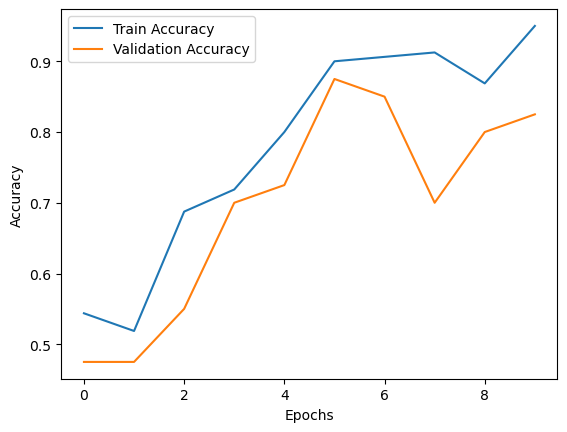

In [82]:
# Reshape input data for CNN
X_cnn = np.array([img.reshape(128, 128, 1) for img in X])  # Reshape to (128, 128, 1)
X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(X_cnn, y_encoded, test_size=0.2, random_state=42)

# Build CNN model
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(128, 128, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# Compile model
cnn_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train model
history = cnn_model.fit(X_train_cnn, y_train_cnn, epochs=10, validation_data=(X_test_cnn, y_test_cnn))

# Evaluate CNN model
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_cnn, y_test_cnn)
print(f"Test Accuracy (CNN): {cnn_accuracy:.2f}")

# Plot training performance
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## 6. Model Comparison

Random Forest Accuracy: 0.95
CNN Accuracy: 0.82


C:\Users\hp\AppData\Local\Temp\ipykernel_19624\1760145912.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette="viridis")


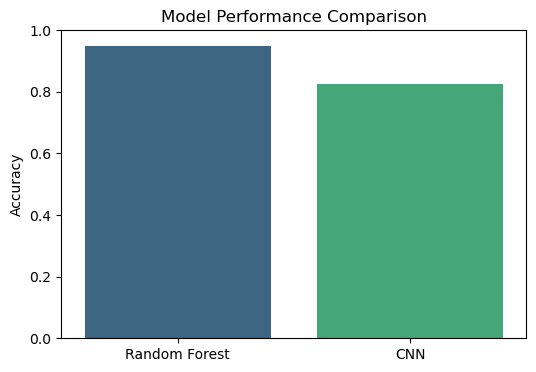

In [91]:
# Encode labels
encoder = LabelEncoder()
y = encoder.fit_transform(y)  # 0 = First Print, 1 = Second Print

# Compare accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)  # Random Forest Accuracy
cnn_accuracy = cnn_accuracy  # Use the previously computed CNN accuracy

# Print accuracy scores
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print(f"CNN Accuracy: {cnn_accuracy:.2f}")

# Display bar chart comparison
models = ["Random Forest", "CNN"]
accuracies = [rf_accuracy, cnn_accuracy]

plt.figure(figsize=(6, 4))
sns.barplot(x=models, y=accuracies, palette="viridis")
plt.ylabel("Accuracy")
plt.title("Model Performance Comparison")
plt.ylim(0, 1)
plt.show()

In [92]:
import joblib

# Save the trained Random Forest model
joblib.dump(rf_model, 'random_forest_model.pkl')

print("Random Forest model saved successfully!")

Random Forest model saved successfully!


In [85]:
import tensorflow as tf

# Save the trained CNN model
cnn_model.save('cnn_model.h5')

print("CNN model saved successfully!")

CNN model saved successfully!


## Identify Misclassified Images

In [93]:
import numpy as np

# Reshape flattened features back to (128, 128, 1) for CNN
X_test_reshaped = X_test.reshape(-1, 128, 128, 1)

# Get CNN predictions using the correctly shaped input
cnn_preds = np.argmax(cnn_model.predict(X_test_reshaped), axis=1)  # Convert softmax output to class index

# Get Random Forest predictions
rf_preds = rf_model.predict(X_test)  # Replaced SVM with RF

# Identify misclassified cases
rf_misclassified = np.where(rf_preds != y_test)[0]
cnn_misclassified = np.where(cnn_preds != y_test)[0]

print(f"Random Forest Misclassified: {len(rf_misclassified)} samples")
print(f"CNN Misclassified: {len(cnn_misclassified)} samples")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step 
Random Forest Misclassified: 2 samples
CNN Misclassified: 19 samples


### **Deployment Considerations**  

Deploying the QR code authentication model requires efficiency, robustness, and security. The model can be integrated into mobile apps or web platforms, enabling real-time verification. Computational efficiency is crucial; lightweight models ensure fast inference, while deep learning may require GPU acceleration for scalability.  

Robustness against varying scanning conditions (low resolution, lighting, distortions) can be improved with image preprocessing techniques like noise reduction and contrast enhancement. Security is a key factor—adversaries might manipulate QR codes, so cryptographic signatures or watermarking can enhance protection.  

For scalability, regular model updates and retraining with new counterfeit samples will maintain accuracy. The system should handle high traffic efficiently while ensuring reliability in authentication processes.  